<a href="https://colab.research.google.com/github/ynis858-bit/Rapport-Des-Ventes/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
# lire la base de données
df= pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
pd.set_option('display.max_rows', 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
...,...
Loan_ID,0
CoapplicantIncome,0
ApplicantIncome,0
Property_Area,0


In [ ]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# Renseigner les valeurs manquantes
cat_data= []
num_data= []
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data= pd.DataFrame(cat_data).transpose()
num_data= pd.DataFrame(num_data).transpose()


In [ ]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
# pour les valeurs catégorique en va remplacer les valeurs manquantes par les valeurs qui se répète
cat_data= cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

In [ ]:
# pour les valeurs numériques on va remplacer les valeurs manquantes par la valeur précédente de la meme colonne
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

/tmp/ipython-input-2138931323.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


np.False_

In [ ]:
# transformer la colonne target
target_value= {'Y':1, 'N':0}
target= cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target= target.map(target_value)
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
#remplacer les valeurs catégoriques par des valeurs numérique
le= LabelEncoder()
for i in cat_data:
  cat_data[i]= le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
# supprimer loan_id
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
# concatener cat_data et num_data et specifier la colonne target
x = pd.concat([cat_data, num_data], axis=1)
y= target


In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
# on va commencer par la variable target
target.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
# la base de données utilisée pour EDA
df= pd.concat([cat_data,num_data, target], axis=1)


le pourcentage des crédits accordée est : 68.73 %
le pourcentage des crédit non accordé est : 31.27 %


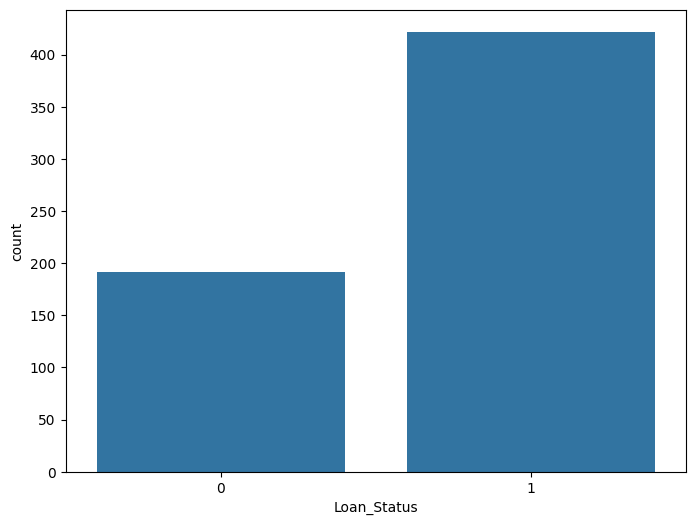

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=target)
yes= round(target.value_counts()[1]/len(target)*100,2)
no= round(target.value_counts()[0]/len(target)*100,2)
print(f'le pourcentage des crédits accordée est : {yes} %')
print(f'le pourcentage des crédit non accordé est : {no} %')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


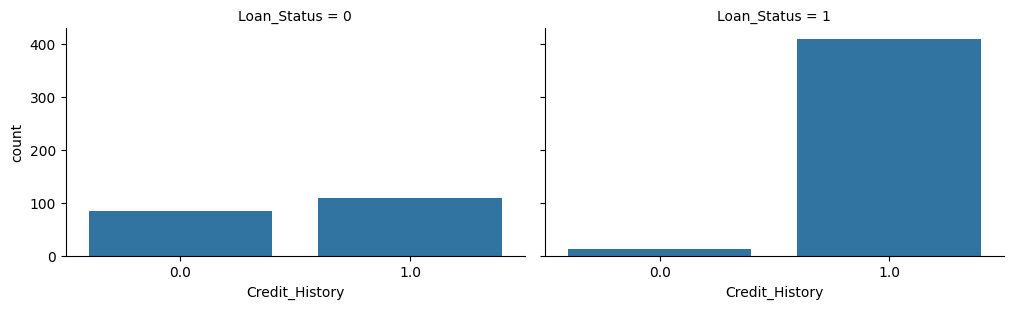

In [ ]:
# Crédit History
grid= sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')



/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


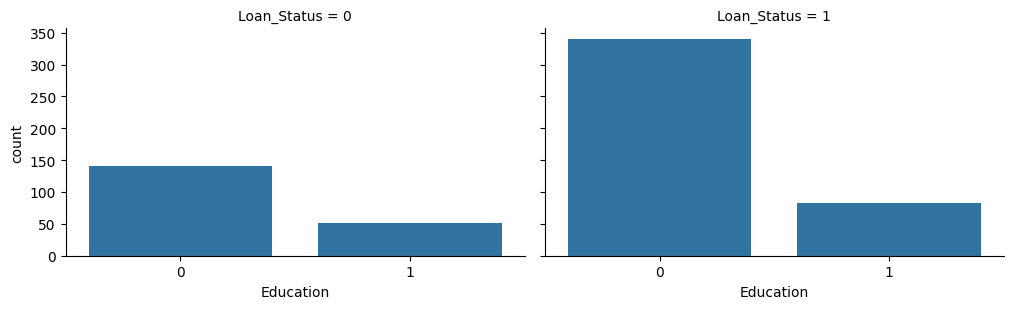

In [ ]:
# Education
grid= sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

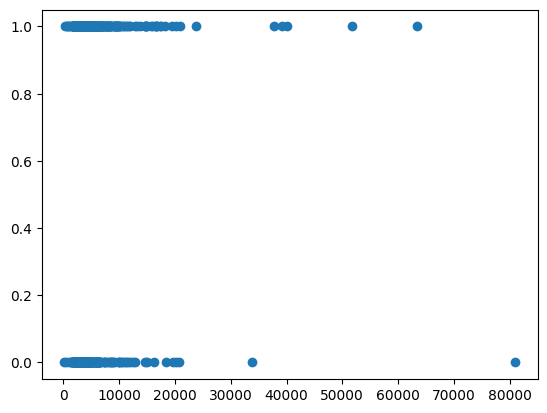

In [ ]:
# revenue de demandeur
plt.scatter(x=df['ApplicantIncome'], y=df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [ ]:
# Diviser la base de données en une base de données test et d'entrainement
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(x,y):
  x_train, x_test= x.iloc[train], x.iloc[test]
  y_train, y_test= y.iloc[train], y.iloc[test]
print('x_train taille', x_train.shape)
print('x_test taille', x_test.shape)
print('y_train taille', y_train.shape)
print('y_test taille', y_test.shape)


x_train taille (491, 11)
x_test taille (123, 11)
y_train taille (491,)
y_test taille (123,)


In [ ]:
# On va appliquer trois algorithmes Logistics Regression, KNN, DecisionTree
models= {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=1, random_state=42)
}
# la fonction de précision
def accu(y_true, y_pred, retu=False):
  acc=accuracy_score(y_true, y_pred)
  if retu:
    return acc
  else:
    print(f'la précision du model est: {acc}')
# c'est la fonction d'application des modèles
def train_test_eval(models, x_train, x_test, y_train, y_test):
  for name, model in models.items():
    print(name, ':')
    model.fit(x_train, y_train)
    accu(y_test, model.predict(x_test))
    print('-'*30)
train_test_eval(models, x_train, x_test, y_train, y_test)

Logistic Regression :
la précision du model est: 0.8536585365853658
------------------------------
KNN :
la précision du model est: 0.6504065040650406
------------------------------
Decision Tree :
la précision du model est: 0.8455284552845529
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x_2= x[['Credit_History', 'Married', 'CoapplicantIncome']]

In [ ]:
# Diviser la base de données en une base de données test et d'entrainement
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(x_2,y):
  x_train, x_test= x_2.iloc[train], x_2.iloc[test]
  y_train, y_test= y.iloc[train], y.iloc[test]
print('x_train taille', x_train.shape)
print('x_test taille', x_test.shape)
print('y_train taille', y_train.shape)
print('y_test taille', y_test.shape)


x_train taille (491, 3)
x_test taille (123, 3)
y_train taille (491,)
y_test taille (123,)


In [ ]:
train_test_eval(models, x_train, x_test, y_train, y_test)

Logistic Regression :
la précision du model est: 0.8536585365853658
------------------------------
KNN :
la précision du model est: 0.6991869918699187
------------------------------
Decision Tree :
la précision du model est: 0.8455284552845529
------------------------------


In [ ]:
# appliquer la regression logistique sur notre base de données
Classifier= LogisticRegression()
Classifier.fit(x_2,y)

LogisticRegression()

In [ ]:
# enregistrer le model
pickle.dump(Classifier, open('model.pkl', 'wb'))